In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
from src.score import *

In [18]:
sns.set_style('darkgrid')
sns.set_context('notebook')

In [19]:
DATADIR = '/data/weather-benchmark/5.625deg/geopotential_500/'
PREDDIR = '/data/weather-benchmark/predictions/'

In [70]:
z500_validation = load_test_data(DATADIR)

/home/rasp/repositories/weather-benchmark/notebooks/src/score.py:24: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  ds = xr.open_mfdataset(f'{path}/*.nc')[var]
/home/rasp/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


In [96]:
tigge = xr.open_mfdataset('/data/weather-benchmark/tigge/5.625deg/*').gh.squeeze() * 9.807

/home/rasp/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/home/rasp/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied do not have global dimension coordinates. In
future, to continue concatenating without supplying dimension
coordinates, please use the new `combine_nested` function (or the
`combine='nested'` option to open_mfdataset.
  from_openmfds=True,


In [116]:
t21 = xr.open_mfdataset(f'/media/rasp/Elements/weather-benchmark/IFS_T21/raw/output_pl_5.625*.nc').z.sel(lev=5e4)

/home/rasp/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/home/rasp/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied do not have global dimension coordinates. In
future, to continue concatenating without supplying dimension
coordinates, please use the new `combine_nested` function (or the
`combine='nested'` option to open_mfdataset.
  from_openmfds=True,


In [117]:
t21

<xarray.DataArray 'z' (time: 42340, lat: 32, lon: 64)>
dask.array<getitem, shape=(42340, 32, 64), dtype=float32, chunksize=(21344, 32, 64)>
Coordinates:
  * lat      (lat) float64 87.19 81.56 75.94 70.31 ... -75.94 -81.56 -87.19
  * lon      (lon) float64 -180.0 -174.4 -168.8 -163.1 ... 163.1 168.8 174.4
    lev      float64 5e+04
  * time     (time) datetime64[ns] 2017-01-01 ... 2018-01-07T18:00:00
Attributes:
    standard_name:  geopotential
    long_name:      Geopotential
    units:          m**2 s**-2
    code:           129
    table:          128

In [118]:
tigge.lat

<xarray.DataArray 'lat' (lat: 32)>
array([-87.1875, -81.5625, -75.9375, -70.3125, -64.6875, -59.0625, -53.4375,
       -47.8125, -42.1875, -36.5625, -30.9375, -25.3125, -19.6875, -14.0625,
        -8.4375,  -2.8125,   2.8125,   8.4375,  14.0625,  19.6875,  25.3125,
        30.9375,  36.5625,  42.1875,  47.8125,  53.4375,  59.0625,  64.6875,
        70.3125,  75.9375,  81.5625,  87.1875])
Coordinates:
  * lat      (lat) float64 -87.19 -81.56 -75.94 -70.31 ... 75.94 81.56 87.19
    lev      float64 5e+04

In [119]:
l = t21.lon.values

In [120]:
l[:32] = 360 + l[:32]

In [121]:
l

array([180.   , 185.625, 191.25 , 196.875, 202.5  , 208.125, 213.75 ,
       219.375, 225.   , 230.625, 236.25 , 241.875, 247.5  , 253.125,
       258.75 , 264.375, 270.   , 275.625, 281.25 , 286.875, 292.5  ,
       298.125, 303.75 , 309.375, 315.   , 320.625, 326.25 , 331.875,
       337.5  , 343.125, 348.75 , 354.375,   0.   ,   5.625,  11.25 ,
        16.875,  22.5  ,  28.125,  33.75 ,  39.375,  45.   ,  50.625,
        56.25 ,  61.875,  67.5  ,  73.125,  78.75 ,  84.375,  90.   ,
        95.625, 101.25 , 106.875, 112.5  , 118.125, 123.75 , 129.375,
       135.   , 140.625, 146.25 , 151.875, 157.5  , 163.125, 168.75 ,
       174.375])

In [122]:
t21['lat'] = -tigge.lat

In [123]:
t21

<xarray.DataArray 'z' (time: 42340, lat: 32, lon: 64)>
dask.array<getitem, shape=(42340, 32, 64), dtype=float32, chunksize=(21344, 32, 64)>
Coordinates:
  * lat      (lat) float64 87.19 81.56 75.94 70.31 ... -75.94 -81.56 -87.19
  * lon      (lon) float64 180.0 185.6 191.2 196.9 ... 157.5 163.1 168.8 174.4
    lev      float64 5e+04
  * time     (time) datetime64[ns] 2017-01-01 ... 2018-01-07T18:00:00
Attributes:
    standard_name:  geopotential
    long_name:      Geopotential
    units:          m**2 s**-2
    code:           129
    table:          128

In [128]:
t21 = t21.roll(lon=32)

/home/rasp/miniconda3/lib/python3.7/site-packages/xarray/core/dataarray.py:2710: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  shifts=shifts, roll_coords=roll_coords, **shifts_kwargs


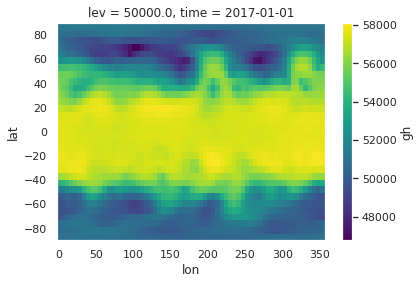

In [124]:
tigge.isel(time=0).plot()

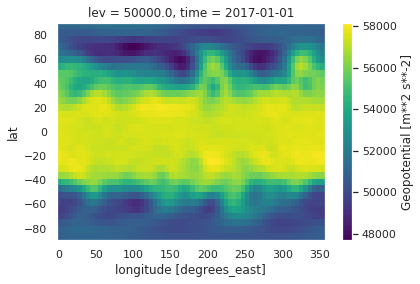

In [147]:
t21.isel(time=0).plot()

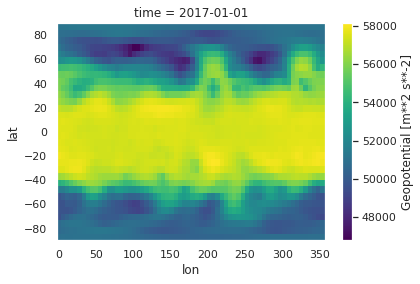

In [142]:
z500_validation.isel(time=0).plot()

In [163]:
t21.isel(time=slice(0, 21)).values.shape, z500_validation.isel(time=slice(0, 21)).values.shape

((21, 32, 64), (21, 32, 64))

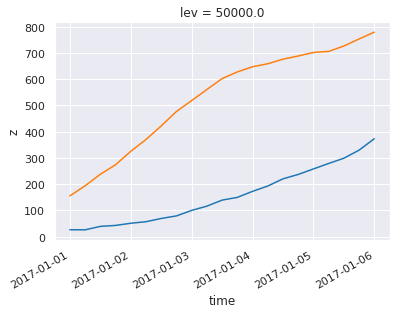

In [164]:
np.sqrt(((tigge.isel(time=slice(0, 21)) - z500_validation)**2).mean(('lat', 'lon'))).plot()
np.sqrt(((t21.isel(time=slice(0, 21)) - z500_validation)**2).mean(('lat', 'lon'))).plot()

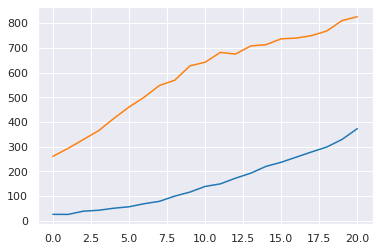

In [188]:
plt.plot(np.sqrt(((tigge.isel(time=slice(0, 21)).values - z500_validation.isel(time=slice(0, 21*6, 6)).values)**2).mean((1, 2))))
plt.plot(np.sqrt(((t21.isel(time=slice(0, 21)).values[:, ::-1] - z500_validation.isel(time=slice(1*6, 22*6, 6)).values)**2).mean((1, 2))))

In [130]:
def convert(da, nlead_time):
    init_times = da.time[::nlead_time]
    lead_times = xr.DataArray(
        np.arange(0, 6*nlead_time, 6), dims=['lead_time'], coords={'lead_time': np.arange(0, 6*nlead_time, 6)})
    da_by_lead = xr.DataArray(
        da.values.reshape((len(init_times), len(lead_times), len(da.lat), len(da.lon))),
        dims = ['time', 'lead_time', 'lat', 'lon'],
        coords = {'time': init_times, 'lead_time': lead_times, 'lat': da.lat, 'lon': da.lon}
    )
    return da_by_lead

In [131]:
tigge_by_lead = convert(tigge, 21).load()

In [132]:
t21_by_lead = convert(t21, 29)

In [150]:
t21_by_lead

<xarray.DataArray (time: 1460, lead_time: 29, lat: 32, lon: 64)>
array([[[[51077.49 , 51088.74 , 51105.24 , ..., 51066.74 , 51066.99 ,
          51070.24 ],
         [50683.99 , 50636.99 , 50602.99 , ..., 50859.74 , 50799.99 ,
          50739.99 ],
         [50756.74 , 50535.74 , 50339.49 , ..., 51401.24 , 51211.74 ,
          50988.74 ],
         ...,
         [50412.74 , 50566.24 , 50730.24 , ..., 50140.74 , 50198.49 ,
          50287.74 ],
         [50853.74 , 50960.74 , 51054.74 , ..., 50505.99 , 50622.49 ,
          50739.74 ],
         [50859.74 , 50911.99 , 50958.74 , ..., 50683.24 , 50743.74 ,
          50803.24 ]],

        [[51288.316, 51310.566, 51334.316, ..., 51227.566, 51247.066,
          51267.316],
         [50913.066, 50883.566, 50864.316, ..., 51017.316, 50985.066,
          50948.566],
         [50886.566, 50655.316, 50447.316, ..., 51484.816, 51326.566,
          51118.816],
         ...,
         [50417.816, 50557.816, 50695.816, ..., 50085.816, 50177.816,
       

In [133]:
tigge_by_lead.to_netcdf(f'{PREDDIR}/tigge_5.625deg.nc')
t21_by_lead.to_netcdf(f'{PREDDIR}/t21_5.625deg.nc')

In [134]:
rmses_tigge = evaluate_iterative_forecast(tigge_by_lead, z500_validation)

In [135]:
rmses_t21 = evaluate_iterative_forecast(t21_by_lead.isel(lead_time=slice(0, 21)), z500_validation)

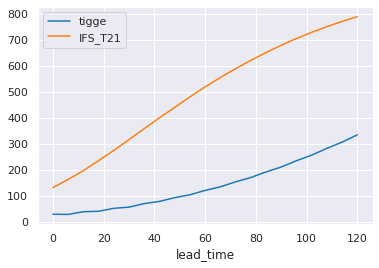

In [145]:
rmses_tigge.plot(label='tigge')
rmses_t21.plot(label='IFS_T21')
plt.legend()